# Import Libraries

In [63]:
import json
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime

# Download file of the day 2018-03-03 from gharchive.

In [ ]:
for x in range(0, 24):
    url = 'https://data.gharchive.org/2018-03-03-{}.json.gz'.format(x)
    r = requests.get(url, allow_redirects=True)
    open('2018-03-04-{}.json.gz'.format(x), 'wb').write(r.content)

# Generate DataFrame with specific features to solve memory problems

## Structure of json file :

{
	"id":"",
	"type":"",
	"actor":{
		"id":,
		"login":
			"balloobbot",
			"display_login":"",
			"gravatar_id":"",
			"url":"",
			"avatar_url":""
			},
	"repo":{
		"id":,
		"name":"",
		"url":""
			},
	"payload":{
		"action":"",
		"issue":{
			"url":"",
			"repository_url":"",
			"labels_url":"",
			"comments_url":"",
			"events_url":"",
			"html_url":"",
			"id":,
			"number":,
			"title":"",
			"user":{
				"login":"",
				"id":,
				"avatar_url":"",
				"gravatar_id":"",
				"url":"",
				"html_url":"",
				"followers_url":"",
				"following_url":"",
				"gists_url":"",
				"starred_url":"",
				"subscriptions_url":"",
				"organizations_url":"",
				"repos_url":"",
				"events_url":"",
				"received_events_url":"",
				"type":"",
				"site_admin":
				},
			"labels":[],
			"state":"",
			"locked":,
			"assignee":,
			"assignees":,
			"milestone":,
			"comments":,
			"created_at":"",
			"updated_at":"",
			"closed_at":,
			"author_association":"",
			"body":""
			},
			"comment":{
				"url":"",
				"html_url":"",
				"issue_url":"",
				"id":,
				"user":{
					"login":"",
					"id":16367972,
					"avatar_url":"",
					"gravatar_id":"",
					"url":"",
					"html_url":"",
					"followers_url":"",
					"following_url":"",
					"gists_url":"",
					"starred_url":"",
					"subscriptions_url":"",
					"organizations_url":"",
					"repos_url":"",
					"events_url":"",
					"received_events_url":"",
					"type":"User",
					"site_admin":
					},
				"created_at":"",
				"updated_at":"",
				"author_association":"",
				"body":""
				}
			},
	"public":,
	"created_at":"",
	"org":{
		"id":,
		"login":"",
		"gravatar_id":"",
		"url":"",
		"avatar_url":""
		}
}

In [161]:
log=[]

for x in range(0,24):
    with open('2018-03-03-{}.json'.format(x), encoding="utf8") as json_file:
        for line in json_file:
            data=json.loads(line)
            #log.append([data["type"]])
            #log.append([data["type"],data["actor"]["id"],data["actor"]["login"]])
            
            #log.append([data["created_at"],data["type"],data["actor"]["gravatar_id"],data["actor"]["id"],data["actor"]["login"]])
            #log.append([data["repo"]["id"],data["type"],data["actor"]["login"]])
            #log.append([data["repo"]["id"],data["type"]])
            #log.append([datetime.strptime(data["created_at"], '%Y-%m-%dT%H:%M:%SZ'),data["type"]])
            #try:
            #    log.append([datetime.strptime(data["created_at"], '%Y-%m-%dT%H:%M:%SZ'),data["type"],data['payload']['pull_request']['base']['repo']['homepage']])
            #except:
            #    continue
#df1 = pd.DataFrame.from_records(log,columns=["Event"]) #for Q1
#df2 = pd.DataFrame.from_records(log,columns=["Event", "ID", "Login"]) # for Q2 and Q4

#df5 = pd.DataFrame.from_records(log,columns=["Date","Event", "Gravatar_ID", "ID", "Login"]) #for Q5 and Q6
#df7 = pd.DataFrame.from_records(log,columns=["ID_repo","Event"])
#df8 = pd.DataFrame.from_records(log,columns=["ID_repo","Event",'User'])
#df9 = pd.DataFrame.from_records(log,columns=["Date","Event"])
#df10 = pd.DataFrame.from_records(log,columns=["Date","Event","Domaine"])

# Question 1 : the different kind of events 

In [8]:
df1.groupby(['Event']).size()
del df1

Event
CommitCommentEvent                 1978
CreateEvent                      152012
DeleteEvent                       30837
ForkEvent                         26896
GollumEvent                        6101
IssueCommentEvent                 56644
IssuesEvent                       33883
MemberEvent                        5429
PublicEvent                        1040
PullRequestEvent                  50825
PullRequestReviewCommentEvent     11614
PushEvent                        575213
ReleaseEvent                       3492
WatchEvent                        76746
dtype: int64

# Question 2 :  The top 10 users with most commits

In [10]:
df2[df2["Event"]=="CommitCommentEvent"].groupby(["Login"])["Event"].count().sort_values(ascending=False).head(10)

Login
coryamanda        56
jrfaller          46
kozel-stas        30
leventekobor94    26
dzmitry-vasin     25
demofan           24
xihi[bot]         23
norotime          22
xnagpa            20
lintr-bot         19
Name: Event, dtype: int64

# Question 4 : Total, Mean and std of the number of commits 

In [26]:
df4=pd.DataFrame({'Login':df2[df2["Event"]=="CommitCommentEvent"].groupby(["Login"])["Event"].count().index, 'Number':df2[df2["Event"]=="CommitCommentEvent"].groupby(["Login"])["Event"].count().values})
print("Total : " ,df4["Number"].sum(),
"Mean : " ,df4["Number"].mean(),
"Std : ", df4["Number"].std())
print(df4.sort_values(by='Login',ascending=True).head(10))
del df4
del df2

Total :  1978 Mean :  1.9545454545454546 Std :  3.4746373820308816
           Login  Number
0           0pdd      10
1         0x0ade       1
2     1160300415       1
3      403141449       1
4         406665       1
5        6enjoy6       1
6      A01700043       2
7      AAAstorga       1
8  ATechnoHazard       1
9     AbdullaevN       1


# Question 5 : Nbr of users nbr of users with agravatar account

In [42]:
print("Number of user account : ", len(df5["Login"].unique()))
print("Number of gravatar account : ", df5[df5["Gravatar_ID"]!=''].size)

Number of user account :  218042
Number of gravatar account :  0


# Question 6 : Repositories were affected by the PushEvent 

In [46]:
print (df5[df5["Event"]=="PushEvent"][(df5['Date'] > '2018-03-03T00:00:00Z') & (df5['Date'] < '2018-03-03T10:00:00Z')])
print("Repositories were affected by the PushEvent : ", len(df5[df5["Event"]=="PushEvent"][(df5['Date'] > '2018-03-03T00:00:00Z') & (df5['Date'] < '2018-03-03T10:00:00Z')]))
del df5

c:\users\administrateur\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


                        Date      Event Gravatar_ID        ID            Login
8       2018-03-03T00:00:01Z  PushEvent               4120976        stukey524
9       2018-03-03T00:00:01Z  PushEvent               1658576        vivek1729
10      2018-03-03T00:00:01Z  PushEvent               2545978         eeholmes
11      2018-03-03T00:00:01Z  PushEvent              12463718       gcalderone
12      2018-03-03T00:00:01Z  PushEvent              36152964  andrewbiessener
...                      ...        ...         ...       ...              ...
379072  2018-03-03T09:59:59Z  PushEvent               2091292   jethrogillgren
379073  2018-03-03T09:59:59Z  PushEvent               2623207        lopossumi
379074  2018-03-03T09:59:59Z  PushEvent              32068585   adrienbarbusse
379076  2018-03-03T09:59:59Z  PushEvent              33654977     tshr20171114
379078  2018-03-03T09:59:59Z  PushEvent              13071103        LuHaoPeng

[208390 rows x 5 columns]
Repositories were affecte

c:\users\administrateur\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


# Question 7 :  histogram of number of repositories affected by 𝑛 events

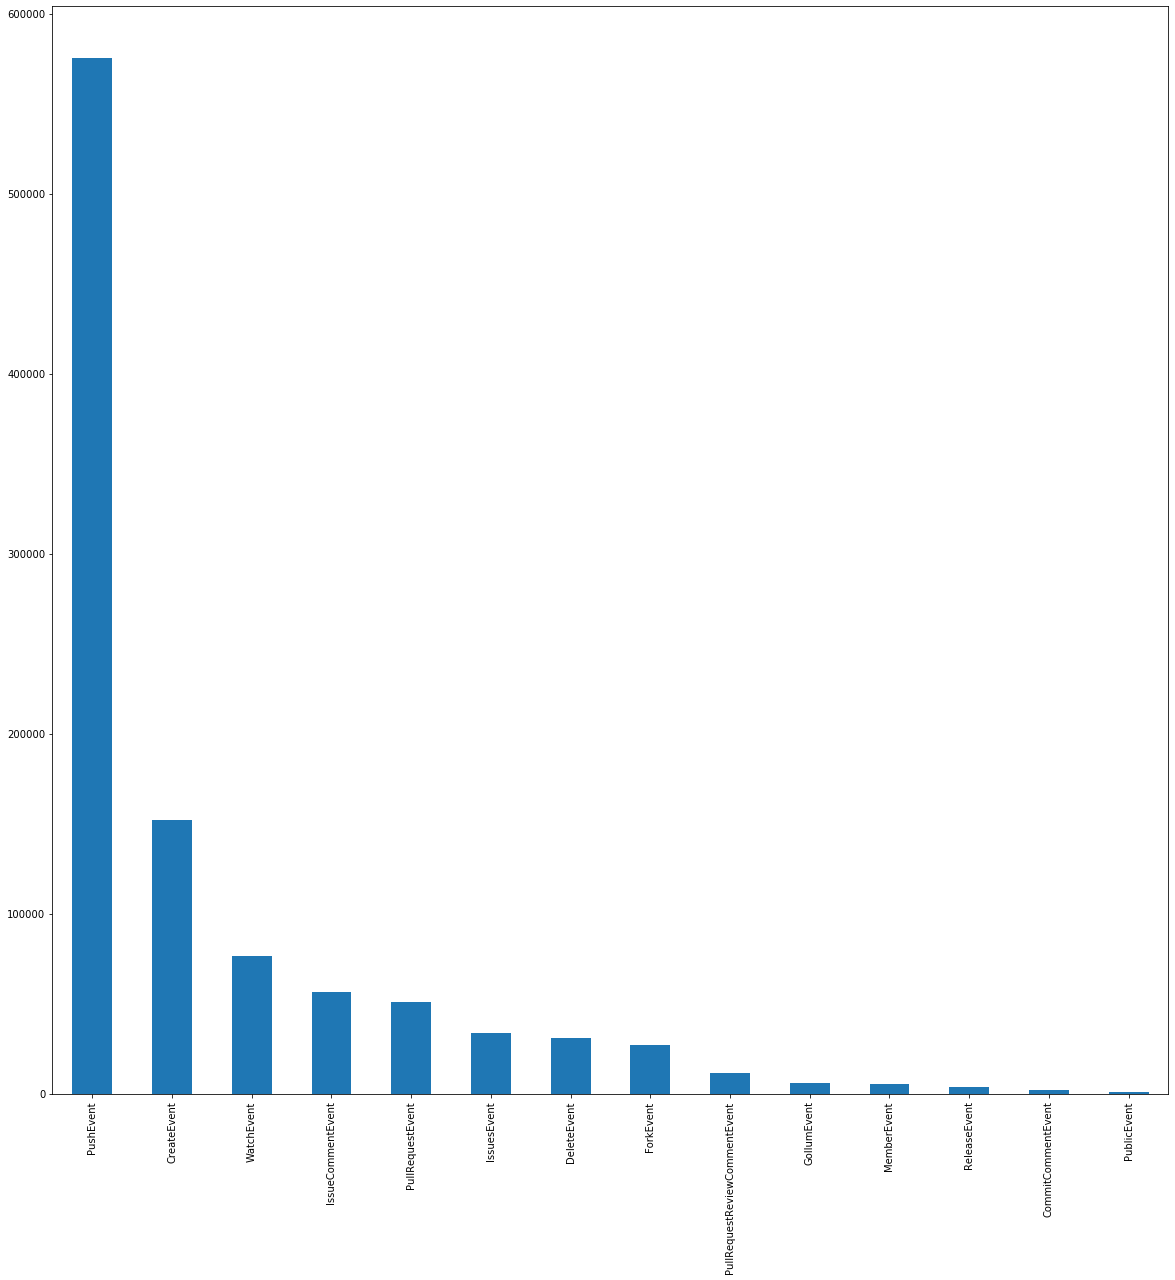

In [51]:
fig, ax = plt.subplots(figsize=(20,20))
df7['Event'].value_counts().plot(kind='bar')
#fig.savefig('Q7_Hist.png')
del df7

# Question 8 : Top 100 User / Repo / User-Repo with more events

In [197]:
#df8.head(10)
print("The top 100 users with more events : \n", df8.groupby(["User"])['Event'].count().sort_values(ascending=False).head(100),'\n')
print("The top 100 repositories with more events : \n", df8.groupby(["ID_repo"])['Event'].count().sort_values(ascending=False).head(100),'\n')
print("The intersection between them : \n", df8.groupby(["User","ID_repo"])['Event'].count().sort_values(ascending=False).head(100))

del df8

The top 100 users with more events : 
 User
newstools                        16671
unitydemo2                       14882
LombiqBot                        11980
dipper-github-fra-sin-syd-nrt     8716
dipper-github-lhr-yul-sfo-icn     6739
                                 ...  
codecov-io                         290
fmcpherson                         289
docloopalpha[bot]                  287
pingpongboss                       284
houndci-bot                        283
Name: Event, Length: 100, dtype: int64 

The top 100 repositories with more events : 
 ID_repo
118083636    14882
108593869     8716
82288102      7968
92620036      6739
59465493      4259
             ...  
100835434      281
122727962      280
3234987        278
108691336      277
101475839      277
Name: Event, Length: 100, dtype: int64 

The intersection between them : 
 User                           ID_repo  
unitydemo2                     118083636    14882
dipper-github-fra-sin-syd-nrt  108593869     8716
newstoo

# Question 9 : The distribution of the number of issues 

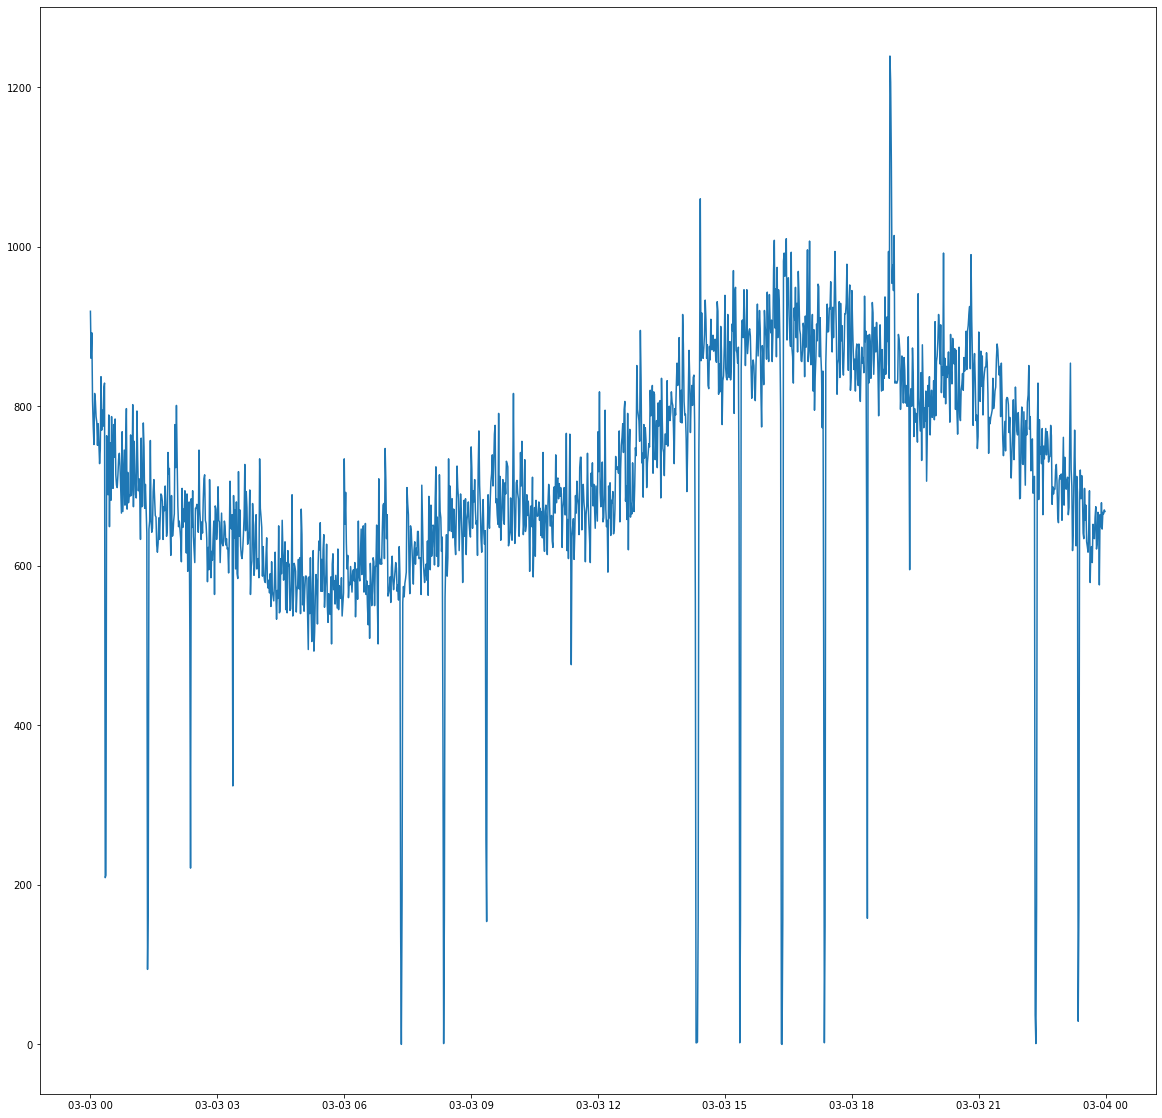

In [70]:
df9.index = df9['Date'] 
df9_T=df9.resample('T').count()
df9_T=df9_T.drop(columns="Date")
df9_T=df9_T.reset_index()
date_objects = df9_T['Date'].values
fig, ax = plt.subplots(figsize=(20,20))
print(plt.plot(date_objects, df9_T['Event'].values))

#Other methode
#fig = go.Figure(go.Scatter(
#    x = df9_T['Date'].values,
#    y = df9_T['Event'].values,
#))
#
#fig.update_layout(
#    title = 'Time Series',
#    xaxis_tickformat = '%d'
#)
#
#fig.show()

del df9
del df9_T

# Question 10 : French touch

In [199]:
df10=df10.dropna()

print("French domains with more number of commits : " ,df10[(df10['Domaine'].str.contains(pat ='.fr',regex = False))&(~df10['Domaine'].str.contains(pat ='.com',regex = False))&(~df10['Domaine'].str.contains(pat ='.org',regex = False))&(~df10['Domaine'].str.contains(pat ='.net',regex = False))].groupby(["Domaine"])["Event"].count().sort_values(ascending=False).head(1))

print("Percentage of commits come from .fr domains: {}%".format(df10[(df10['Domaine'].str.contains(pat ='.fr',regex = False))&(~df10['Domaine'].str.contains(pat ='.com',regex = False))&(~df10['Domaine'].str.contains(pat ='.org',regex = False))&(~df10['Domaine'].str.contains(pat ='.net',regex = False))].groupby(["Domaine"])["Event"].count().size/len(df10))) 

French domains with more number of commits :  Domaine
https://coq.inria.fr/    17
Name: Event, dtype: int64
Percentage of commits come from .fr domains: 0.0007978299026647519%
